In [1]:
!pip install --upgrade pip
!pip install --upgrade mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 68.5 MB/s eta 0:00:00


In [2]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [3]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


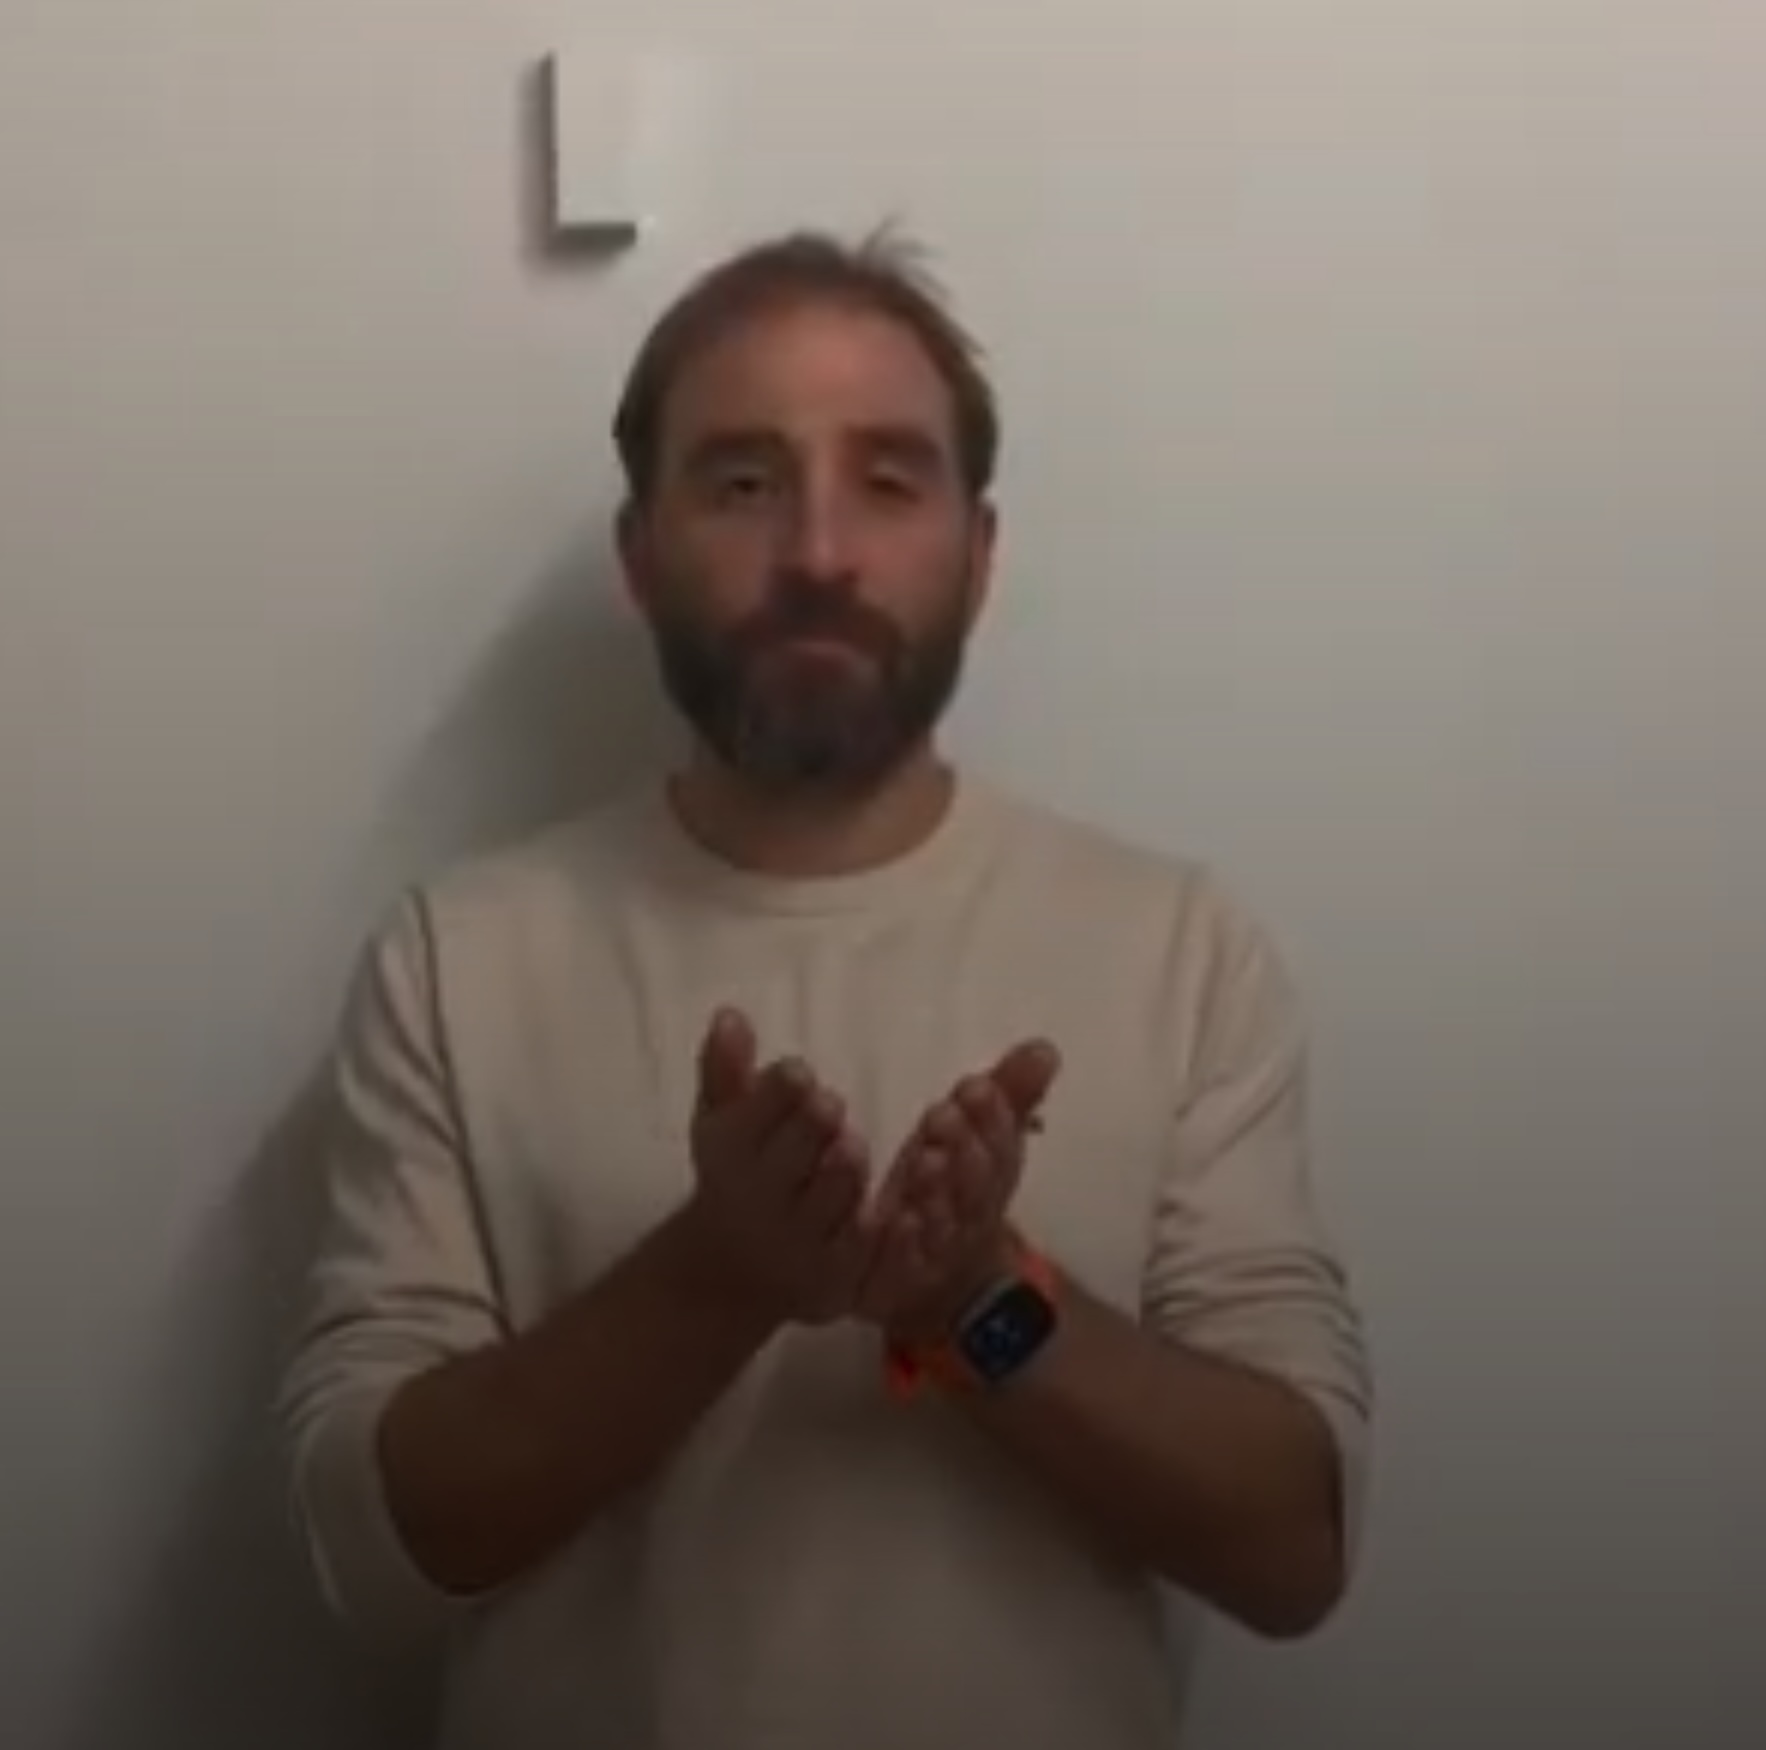

In [4]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np



MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  #annotated_image = np.copy(rgb_image)

  # Get the dimensions of the original image
  height, width, channels = rgb_image.shape

  # Create a black image with the same resolution (all pixel values set to 0)
  annotated_image = np.zeros((height, width, channels), dtype=np.uint8)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

def draw_pose_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image
from google.colab import drive
import requests
from IPython.display import Video, display

# Mount Google Drive
drive.mount('/content/drive')
import os
import cv2
from google.colab.patches import cv2_imshow


#!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg



#img = cv2.imread("image.jpg")
#img = cv2.imread(image_file)
#cv2_imshow(img)

image_file = "/content/drive/MyDrive/ASL_project/sample_images_videos/Ilan_Book.jpg"

# Mount Google Drive
drive.mount('/content/drive')

# File path
#image_file = "/content/drive/MyDrive/ASL_project/sample_images_videos/ilan_Book.jpg"

#for root, dirs, files in os.walk("/content/drive/MyDrive/ASL_project/sample_images_videos"):
#    print(f"Directory: {root}")
#    for file in files:
#        print(f"  File: {file}")



# Verify the file exists
if not os.path.exists(image_file):
    print("File does not exist:", image_file)
else:
    # Read and display the image
    img = cv2.imread(image_file)
    if img is None:
        print("Failed to read the image. Check the file format or path.")
    else:
        cv2_imshow(img)


Detection Pose:  PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.46147578954696655, y=0.32568198442459106, z=-0.7628456950187683, visibility=0.9991652965545654, presence=0.9996981620788574), NormalizedLandmark(x=0.49016183614730835, y=0.29021579027175903, z=-0.6918324828147888, visibility=0.9983490705490112, presence=0.9996127486228943), NormalizedLandmark(x=0.5045371651649475, y=0.2909312844276428, z=-0.6924611330032349, visibility=0.9981877207756042, presence=0.9995971322059631), NormalizedLandmark(x=0.5238049030303955, y=0.2918645739555359, z=-0.6925383806228638, visibility=0.998468816280365, presence=0.9993981122970581), NormalizedLandmark(x=0.4394574761390686, y=0.29008060693740845, z=-0.692558228969574, visibility=0.998977541923523, presence=0.9995506405830383), NormalizedLandmark(x=0.4250337481498718, y=0.29147452116012573, z=-0.6937588453292847, visibility=0.9991995692253113, presence=0.9996190071105957), NormalizedLandmark(x=0.41059547662734985, y=0.29334777593612

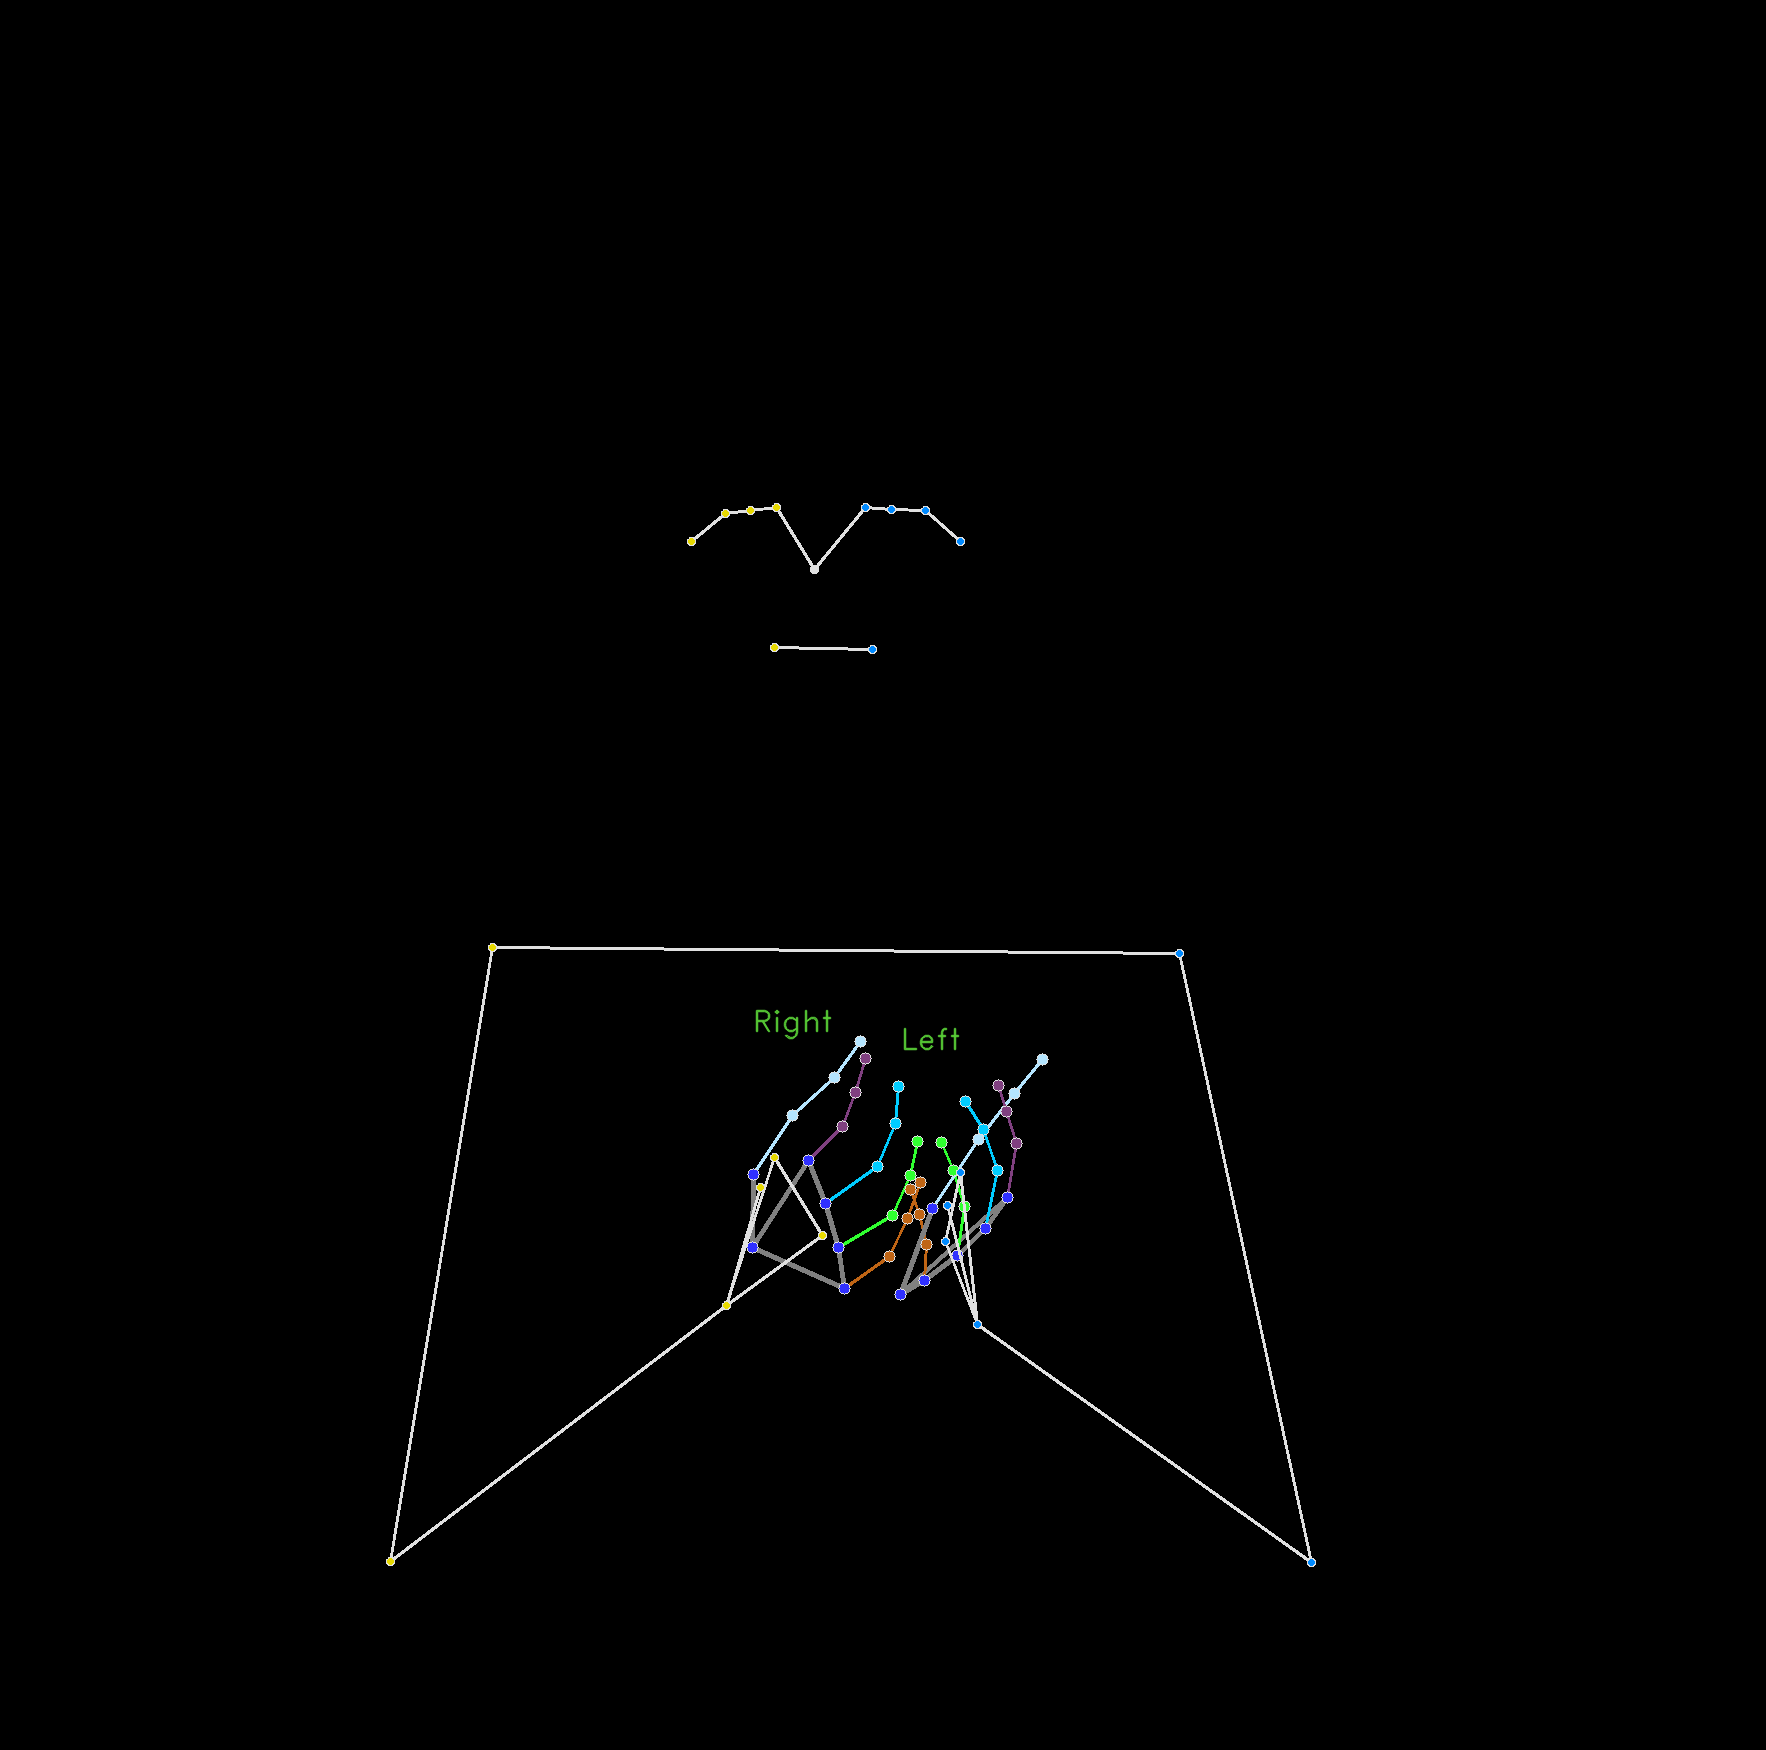

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
#image = mp.Image.create_from_file("image.jpg")
image = mp.Image.create_from_file(image_file)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)


base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True)
detector_pose = vision.PoseLandmarker.create_from_options(options_pose)


# STEP 4: Detect pose landmarks from the input image.
detection_pose_result = detector_pose.detect(image)

print("Detection Pose: ", detection_pose_result)
print("Shape: ", len(detection_pose_result.pose_landmarks[0]))


# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
annotated_image = draw_pose_landmarks_on_image(annotated_image, detection_pose_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [ ]:
# Import necessary libraries
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os
import numpy as np
from IPython.display import Video, display

# Step 1: Set up Hand Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2  # Detect up to 2 hands
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

# Step 2: Set up Pose Landmarker
base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Functions to draw hand and pose landmarks (same as the ones you provided)
# ... [Your functions `draw_landmarks_on_image` and `draw_pose_landmarks_on_image` here] ...

# Step 3: Annotate videos from subfolders
def process_videos(input_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Walk through the subfolders of the input folder
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".mp4"):  # Process only MP4 files
                # Input video path
                input_video_path = os.path.join(root, file)

                # Determine subfolder structure for the output
                relative_path = os.path.relpath(root, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)

                # Output video path
                output_video_path = os.path.join(output_subfolder, file)

                # Process the video
                print(f"Processing video: {input_video_path}")
                cap = cv2.VideoCapture(input_video_path)

                # Get video properties
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                fps = int(cap.get(cv2.CAP_PROP_FPS))


                # Define video writer for the output video
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
                out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Convert frame to RGB for MediaPipe
                    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                    # Create a MediaPipe image object
                    mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

                    # Detect hand landmarks (frame-by-frame)
                    hand_result = hand_landmarker.detect(mp_frame)

                    # Detect pose landmarks (frame-by-frame)
                    pose_result = pose_landmarker.detect(mp_frame)

                    # Annotate the frame
                    annotated_frame = draw_landmarks_on_image(rgb_frame, hand_result)
                    annotated_frame = draw_pose_landmarks_on_image(annotated_frame, pose_result)

                    # Convert annotated frame back to BGR for OpenCV
                    bgr_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)

                    # Write the frame to the output video
                    out.write(bgr_frame)

                # Release video resources
                cap.release()
                out.release()

                print(f"Annotated video saved to {output_video_path}")

# Example Usage
input_folder = "/content/drive/MyDrive/ASL_project/Dataset/test"  # Input folder containing subfolders
output_folder = "/content/drive/MyDrive/ASL_project/Dataset/annotated_test"  # Output folder

# Process all videos
process_videos(input_folder, output_folder)

Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/book/07068_book.mp4
Annotated video saved to /content/drive/MyDrive/ASL_project/Annotated_Dataset/annotated_test/book/07068_book.mp4
Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/book/07070_book.mp4
Annotated video saved to /content/drive/MyDrive/ASL_project/Annotated_Dataset/annotated_test/book/07070_book.mp4
Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/book/WhatsApp Video 2025-01-18 at 17.09.46.mp4
Annotated video saved to /content/drive/MyDrive/ASL_project/Annotated_Dataset/annotated_test/book/WhatsApp Video 2025-01-18 at 17.09.46.mp4
Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/book/WhatsApp Video 2025-01-18 at 17.09.48.mp4
Annotated video saved to /content/drive/MyDrive/ASL_project/Annotated_Dataset/annotated_test/book/WhatsApp Video 2025-01-18 at 17.09.48.mp4
Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/book/WhatsApp Video 2025-01-18

In [ ]:
# Import necessary libraries
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os
import numpy as np
from IPython.display import Video, display

# Step 1: Set up Hand Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2  # Detect up to 2 hands
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

# Step 2: Set up Pose Landmarker
base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Functions to draw hand and pose landmarks (same as the ones you provided)
# ... [Your functions `draw_landmarks_on_image` and `draw_pose_landmarks_on_image` here] ...

# Step 3: Annotate videos in a specified subfolder
def process_videos_in_subfolder(input_subfolder, output_subfolder):
    # Ensure the output subfolder exists
    os.makedirs(output_subfolder, exist_ok=True)

    # Process only videos in the specified input subfolder
    for file in os.listdir(input_subfolder):
        if file.endswith(".mp4"):  # Process only MP4 files
            # Input video path
            input_video_path = os.path.join(input_subfolder, file)

            # Output video path
            output_video_path = os.path.join(output_subfolder, file)

            # Process the video
            print(f"Processing video: {input_video_path}")
            cap = cv2.VideoCapture(input_video_path)

            # Get video properties
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = int(cap.get(cv2.CAP_PROP_FPS))

            # Define video writer for the output video
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
            out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                # Convert frame to RGB for MediaPipe
                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Create a MediaPipe image object
                mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

                # Detect hand landmarks (frame-by-frame)
                hand_result = hand_landmarker.detect(mp_frame)

                # Detect pose landmarks (frame-by-frame)
                pose_result = pose_landmarker.detect(mp_frame)

                # Annotate the frame
                annotated_frame = draw_landmarks_on_image(rgb_frame, hand_result)
                annotated_frame = draw_pose_landmarks_on_image(annotated_frame, pose_result)

                # Convert annotated frame back to BGR for OpenCV
                bgr_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)

                # Write the frame to the output video
                out.write(bgr_frame)

            # Release video resources
            cap.release()
            out.release()

            print(f"Annotated video saved to {output_video_path}")

# Example Usage
input_subfolder = "/content/drive/MyDrive/ASL_project/Dataset/test/computer_bk"  # Input subfolder
output_subfolder = "/content/drive/MyDrive/ASL_project/Dataset/annotated_test/computer"  # Output subfolder

# Process videos in the specified subfolder
process_videos_in_subfolder(input_subfolder, output_subfolder)


Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/computer_bk/WhatsApp Video 2025-01-25 at 12.46.36.mp4
Annotated video saved to /content/drive/MyDrive/ASL_project/Dataset/annotated_test/computer/WhatsApp Video 2025-01-25 at 12.46.36.mp4
Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/computer_bk/WhatsApp Video 2025-01-25 at 12.46.33.mp4
Annotated video saved to /content/drive/MyDrive/ASL_project/Dataset/annotated_test/computer/WhatsApp Video 2025-01-25 at 12.46.33.mp4
Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/computer_bk/WhatsApp Video 2025-01-25 at 12.46.32.mp4
Annotated video saved to /content/drive/MyDrive/ASL_project/Dataset/annotated_test/computer/WhatsApp Video 2025-01-25 at 12.46.32.mp4
Processing video: /content/drive/MyDrive/ASL_project/Dataset/test/computer_bk/WhatsApp Video 2025-01-25 at 12.46.50.mp4
Annotated video saved to /content/drive/MyDrive/ASL_project/Dataset/annotated_test/computer/WhatsApp Video 2025-01-25 

In [ ]:
# Import necessary libraries
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os
import numpy as np
from IPython.display import Video, display

# Step 1: Set up Hand Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2  # Detect up to 2 hands
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

# Step 2: Set up Pose Landmarker
base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Functions to draw hand and pose landmarks (same as the ones you provided)
# ... [Your functions `draw_landmarks_on_image` and `draw_pose_landmarks_on_image` here] ...

# Step 3: Annotate videos from subfolders
def process_videos(input_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Walk through the subfolders of the input folder
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".mp4"):  # Process only MP4 files
                # Input video path
                input_video_path = os.path.join(root, file)

                # Determine subfolder structure for the output
                relative_path = os.path.relpath(root, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)

                # Output video path
                output_video_path = os.path.join(output_subfolder, file)

                # Skip if the video already exists
                if os.path.exists(output_video_path):
                    print(f"Video already processed. Skipping: {output_video_path}")
                    continue

                # Process the video
                print(f"Processing video: {input_video_path}")
                cap = cv2.VideoCapture(input_video_path)

                # Get video properties
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                fps = int(cap.get(cv2.CAP_PROP_FPS))

                # Define video writer for the output video
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
                out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Convert frame to RGB for MediaPipe
                    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                    # Create a MediaPipe image object
                    mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

                    # Detect hand landmarks (frame-by-frame)
                    hand_result = hand_landmarker.detect(mp_frame)

                    # Detect pose landmarks (frame-by-frame)
                    pose_result = pose_landmarker.detect(mp_frame)

                    # Annotate the frame
                    annotated_frame = draw_landmarks_on_image(rgb_frame, hand_result)
                    annotated_frame = draw_pose_landmarks_on_image(annotated_frame, pose_result)

                    # Convert annotated frame back to BGR for OpenCV
                    bgr_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)

                    # Write the frame to the output video
                    out.write(bgr_frame)

                # Release video resources
                cap.release()
                out.release()

                print(f"Annotated video saved to {output_video_path}")

# Example Usage
input_folder = "/content/drive/MyDrive/ASL_project/Dataset/train"  # Input folder containing subfolders
output_folder = "/content/drive/MyDrive/ASL_project/Dataset/annotated_train"  # Output folder

# Process all videos
process_videos(input_folder, output_folder)

Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_train/book/07069_book.mp4
Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_train/book/69241_book.mp4
Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_train/book/68011_book.mp4
Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_train/book/68012_book.mp4
Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_train/book/07075_book.mp4
Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_train/book/07076_book.mp4
Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_train/book/70212_book.mp4
Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_train/book/70266_book.mp4
Video already processed. Skipping: /content/drive/MyDrive/ASL_project/Dataset/annotated_

In [27]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os
import numpy as np
import pandas as pd

# Step 1: Set up Hand Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

# Step 2: Set up Pose Landmarker
base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Constants for expected number of landmarks
HAND_LANDMARKS = 21  # 21 per hand
POSE_LANDMARKS = 33  # 33 pose landmarks
FEATURES_PER_LANDMARK = 5  # (x, y, z, visibility, presence)
EXPECTED_COLUMNS = (HAND_LANDMARKS * 2 + POSE_LANDMARKS) * FEATURES_PER_LANDMARK  # 375

# Function to process video and extract landmarks
def extract_landmarks(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".mp4"):
                input_video_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)

                output_csv_path = os.path.join(output_subfolder, file.replace('.mp4', '.csv'))

                if os.path.exists(output_csv_path):
                    print(f"Landmark file already exists. Skipping: {output_csv_path}")
                    continue

                cap = cv2.VideoCapture(input_video_path)
                landmarks_data = []

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

                    hand_result = hand_landmarker.detect(mp_frame)
                    pose_result = pose_landmarker.detect(mp_frame)

                    # Create a 375-element array initialized with zeros
                    frame_data = np.zeros(EXPECTED_COLUMNS, dtype=np.float32)

                    # Extract hand landmarks (if detected)
                    if hand_result.hand_landmarks:
                        for hand_idx, hand in enumerate(hand_result.hand_landmarks):
                            for landmark_idx, point in enumerate(hand):
                                # Compute correct index for left and right hands
                                base_index = (hand_idx * HAND_LANDMARKS + landmark_idx) * FEATURES_PER_LANDMARK
                                frame_data[base_index:base_index + FEATURES_PER_LANDMARK] = [point.x, point.y, point.z, point.visibility, point.presence]

                    # Extract pose landmarks (if detected)
                    if pose_result.pose_landmarks:
                        for landmark_idx, landmark in enumerate(pose_result.pose_landmarks[0]):
                            base_index = (HAND_LANDMARKS * 2 + landmark_idx) * FEATURES_PER_LANDMARK
                            frame_data[base_index:base_index + FEATURES_PER_LANDMARK] = [landmark.x, landmark.y, landmark.z, landmark.visibility, landmark.presence]

                    # Append frame data to list
                    landmarks_data.append(frame_data)

                cap.release()

                # Convert to DataFrame and save
                df = pd.DataFrame(landmarks_data)
                df.to_csv(output_csv_path, index=False, header=False)
                print(f"✅ Saved fixed landmarks to {output_csv_path}")

# Example usage
input_folder = "/content/drive/MyDrive/ASL_project/Dataset/train"
output_folder = "/content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed"

extract_landmarks(input_folder, output_folder)


✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/book/07069_book.csv
✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/book/69241_book.csv
✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/book/68011_book.csv
✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/book/68012_book.csv
✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/book/07075_book.csv
✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/book/07076_book.csv
✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/book/70212_book.csv
✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/book/70266_book.csv
✅ Saved fixed landmarks to /content/drive/MyDrive/ASL_project/Dataset/landmark_vectors_fixed/boo

In [19]:
import pandas as pd

# Path to a problematic file
file_path = "/content/drive/MyDrive/ASL_project/Dataset/landmark_vectors/book/WhatsApp Video 2025-01-18 at 22.36.54.csv"

# Load the CSV
df = pd.read_csv(file_path, header=None)

# Print shape and check for missing data
print(f"CSV Shape: {df.shape}")
print(df.head())  # Show first few rows

# Check how many columns are non-null (if some are missing)
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])


CSV Shape: (127, 270)
        0         1         2         3         4         5         6    \
0  0.499667  0.250428 -0.331854  0.999749  0.999445  0.508018  0.218947   
1  0.495280  0.246128 -0.358420  0.999701  0.999412  0.503712  0.218885   
2  0.493281  0.245069 -0.399801  0.999807  0.999610  0.502314  0.218942   
3  0.492950  0.244114 -0.336795  0.999780  0.999709  0.502654  0.219870   
4  0.492506  0.244632 -0.375415  0.999785  0.999645  0.502026  0.219622   

        7         8         9    ...  260  261  262  263  264  265  266  267  \
0 -0.306689  0.999290  0.998803  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1 -0.331074  0.999136  0.998795  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2 -0.372305  0.999319  0.998916  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3 -0.307885  0.999292  0.999227  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4 -0.346472  0.999333  0.999030  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   268  269  
0  NaN  NaN  
1  NaN  NaN  
2  N

In [20]:
import pandas as pd

# Replace with the path to a CSV file that has 270 columns instead of 375
file_path = "/content/drive/MyDrive/ASL_project/Dataset/landmark_vectors/book/WhatsApp Video 2025-01-18 at 22.36.54.csv"

# Load the CSV file
df = pd.read_csv(file_path, header=None)

# Print CSV shape
print(f"CSV Shape: {df.shape}")

# Count missing values per column
missing_counts = df.isnull().sum()

# Find columns with missing values
missing_columns = missing_counts[missing_counts > 0]

if missing_columns.empty:
    print("✅ No missing values found.")
else:
    print("⚠️ Missing values detected in the following columns:")
    print(missing_columns)

# Print first few rows for manual inspection
print("\n🔍 First few rows of the dataset:")
print(df.head())

# Analyze which landmarks are missing
expected_features = 375
actual_features = df.shape[1]

if actual_features < expected_features:
    print(f"\n⚠️ WARNING: This file has only {actual_features} columns instead of 375.")
    print("Possible Missing Data:")
    missing_landmarks = list(range(actual_features, expected_features))
    print(f"These landmarks might be missing: {missing_landmarks}")
elif actual_features > expected_features:
    print(f"\n⚠️ WARNING: This file has {actual_features} columns instead of 375. It has extra data.")


CSV Shape: (127, 270)
⚠️ Missing values detected in the following columns:
165    102
166    102
167    102
168    102
169    102
      ... 
265    102
266    102
267    102
268    102
269    102
Length: 105, dtype: int64

🔍 First few rows of the dataset:
        0         1         2         3         4         5         6    \
0  0.499667  0.250428 -0.331854  0.999749  0.999445  0.508018  0.218947   
1  0.495280  0.246128 -0.358420  0.999701  0.999412  0.503712  0.218885   
2  0.493281  0.245069 -0.399801  0.999807  0.999610  0.502314  0.218942   
3  0.492950  0.244114 -0.336795  0.999780  0.999709  0.502654  0.219870   
4  0.492506  0.244632 -0.375415  0.999785  0.999645  0.502026  0.219622   

        7         8         9    ...  260  261  262  263  264  265  266  267  \
0 -0.306689  0.999290  0.998803  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1 -0.331074  0.999136  0.998795  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2 -0.372305  0.999319  0.998916  ...  NaN  NaN  NaN  

In [21]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os
import numpy as np
import pandas as pd

# Step 1: Set up Hand Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

# Step 2: Set up Pose Landmarker
base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Function to process video and extract landmarks
def extract_landmarks(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".mp4"):
                input_video_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)

                output_csv_path = os.path.join(output_subfolder, file.replace('.mp4', '.csv'))

                if os.path.exists(output_csv_path):
                    print(f"Landmark file already exists. Skipping: {output_csv_path}")
                    continue

                cap = cv2.VideoCapture(input_video_path)
                landmarks_data = []

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

                    hand_result = hand_landmarker.detect(mp_frame)
                    pose_result = pose_landmarker.detect(mp_frame)

                    frame_data = []

                    # Print each landmark's index and values
                    print("\n📌 Extracting Landmarks for New Frame...")

                    # Extract hand landmarks
                    hand_count = 0
                    if hand_result.hand_landmarks:
                        for hand in hand_result.hand_landmarks:
                            for idx, point in enumerate(hand):
                                print(f"Hand {hand_count}, Landmark {idx}: x={point.x}, y={point.y}, z={point.z}, visibility={point.visibility}, presence={point.presence}")
                                frame_data.extend([point.x, point.y, point.z, point.visibility, point.presence])
                            hand_count += 1
                    else:
                        print("⚠️ No hands detected in this frame.")
                        frame_data.extend([0] * 105)  # 42 landmarks * 5 values = 210 (for both hands)

                    # Extract pose landmarks
                    if pose_result.pose_landmarks:
                        for idx, landmark in enumerate(pose_result.pose_landmarks[0]):  # Fix: Get first detection
                            print(f"Pose Landmark {idx}: x={landmark.x}, y={landmark.y}, z={landmark.z}, visibility={landmark.visibility}, presence={landmark.presence}")
                            frame_data.extend([landmark.x, landmark.y, landmark.z, landmark.visibility, landmark.presence])
                    else:
                        print("⚠️ No pose detected in this frame.")
                        frame_data.extend([0] * 165)  # 33 landmarks * 5 values = 165

                    # Ensure exactly 375 elements
                    if len(frame_data) != 375:
                        print(f"❌ WARNING: Frame data length {len(frame_data)} instead of 375! Padding or trimming.")
                        frame_data = frame_data[:375] if len(frame_data) > 375 else frame_data + [0] * (375 - len(frame_data))

                    landmarks_data.append(frame_data)

                cap.release()

                # Convert to DataFrame and save
                df = pd.DataFrame(landmarks_data)
                df.to_csv(output_csv_path, index=False, header=False)
                print(f"✅ Saved landmarks to {output_csv_path}")

# Example usage
input_folder = "/content/drive/MyDrive/ASL_project/Dataset/debug_vector"
output_folder = "/content/drive/MyDrive/ASL_project/Dataset/debug_vector_res"

extract_landmarks(input_folder, output_folder)


In [26]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os
import numpy as np
import pandas as pd

# Step 1: Set up Hand Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

# Step 2: Set up Pose Landmarker
base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Hand landmark names (21 per hand)
hand_landmarks = [
    "Wrist", "Thumb CMC", "Thumb MCP", "Thumb IP", "Thumb Tip",
    "Index MCP", "Index PIP", "Index DIP", "Index Tip",
    "Middle MCP", "Middle PIP", "Middle DIP", "Middle Tip",
    "Ring MCP", "Ring PIP", "Ring DIP", "Ring Tip",
    "Pinky MCP", "Pinky PIP", "Pinky DIP", "Pinky Tip"
]

# Pose landmark names (33 landmarks)
pose_landmarks = [
    "Nose", "Left Eye Inner", "Left Eye", "Left Eye Outer",
    "Right Eye Inner", "Right Eye", "Right Eye Outer", "Left Ear", "Right Ear",
    "Mouth Left", "Mouth Right", "Left Shoulder", "Right Shoulder",
    "Left Elbow", "Right Elbow", "Left Wrist", "Right Wrist",
    "Left Pinky", "Right Pinky", "Left Index", "Right Index",
    "Left Thumb", "Right Thumb", "Left Hip", "Right Hip",
    "Left Knee", "Right Knee", "Left Ankle", "Right Ankle",
    "Left Heel", "Right Heel", "Left Foot Index", "Right Foot Index"
]

# Function to process video and extract landmarks
def extract_landmarks(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".mp4"):
                input_video_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)

                output_csv_path = os.path.join(output_subfolder, file.replace('.mp4', '.csv'))

                if os.path.exists(output_csv_path):
                    print(f"Landmark file already exists. Skipping: {output_csv_path}")
                    continue

                cap = cv2.VideoCapture(input_video_path)
                landmarks_data = []
                first_frame = True  # Flag to print only the first frame

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

                    hand_result = hand_landmarker.detect(mp_frame)
                    pose_result = pose_landmarker.detect(mp_frame)

                    frame_data = []

                    if first_frame:
                        print("\n📌 Extracting Landmarks for First Frame...")

                    # Extract hand landmarks
                    hand_count = 0
                    if hand_result.hand_landmarks:
                        for hand in hand_result.hand_landmarks:
                            for idx, point in enumerate(hand):
                                start_idx = len(frame_data)
                                end_idx = start_idx + 4
                                landmark_name = f"Hand {hand_count} - {hand_landmarks[idx]}" if idx < len(hand_landmarks) else f"Unknown Hand Landmark {idx}"
                                if first_frame:
                                    print(f"{idx + 1} - {landmark_name}, Indexes: {start_idx}-{end_idx}, Values: x={point.x}, y={point.y}, z={point.z}, visibility={point.visibility}, presence={point.presence}")
                                frame_data.extend([point.x, point.y, point.z, point.visibility, point.presence])
                            hand_count += 1
                    else:
                        if first_frame:
                            print("⚠️ No hands detected in this frame.")
                        frame_data.extend([0] * 105)  # 42 landmarks * 5 values = 210 (for both hands)

                    # Extract pose landmarks
                    if pose_result.pose_landmarks:
                        for idx, landmark in enumerate(pose_result.pose_landmarks[0]):  # Fix: Get first detection
                            start_idx = len(frame_data)
                            end_idx = start_idx + 4
                            landmark_name = pose_landmarks[idx] if idx < len(pose_landmarks) else f"Unknown Pose Landmark {idx}"
                            if first_frame:
                                print(f"{idx + 22} - {landmark_name}, Indexes: {start_idx}-{end_idx}, Values: x={landmark.x}, y={landmark.y}, z={landmark.z}, visibility={landmark.visibility}, presence={landmark.presence}")
                            frame_data.extend([landmark.x, landmark.y, landmark.z, landmark.visibility, landmark.presence])
                    else:
                        if first_frame:
                            print("⚠️ No pose detected in this frame.")
                        frame_data.extend([0] * 165)  # 33 landmarks * 5 values = 165

                    # Ensure exactly 375 elements
                    if len(frame_data) != 375:
                        frame_data = frame_data[:375] if len(frame_data) > 375 else frame_data + [0] * (375 - len(frame_data))

                    landmarks_data.append(frame_data)

                    # After printing the first frame, stop printing for the rest
                    first_frame = False

                cap.release()

                # Convert to DataFrame and save
                df = pd.DataFrame(landmarks_data)
                df.to_csv(output_csv_path, index=False, header=False)
                print(f"✅ Saved landmarks to {output_csv_path}")

# Example usage
input_folder = "/content/drive/MyDrive/ASL_project/Dataset/debug_vector"
output_folder = "/content/drive/MyDrive/ASL_project/Dataset/debug_vector_res"

extract_landmarks(input_folder, output_folder)



📌 Extracting Landmarks for First Frame...
⚠️ No hands detected in this frame.
22 - Nose, Indexes: 105-109, Values: x=0.4996674656867981, y=0.2504284083843231, z=-0.33185383677482605, visibility=0.9997488856315613, presence=0.9994446635246277
23 - Left Eye Inner, Indexes: 110-114, Values: x=0.5080180168151855, y=0.2189469337463379, z=-0.3066885769367218, visibility=0.9992902278900146, presence=0.9988032579421997
24 - Left Eye, Indexes: 115-119, Values: x=0.5158757567405701, y=0.2200888991355896, z=-0.3070926070213318, visibility=0.9992992877960205, presence=0.9989218711853027
25 - Left Eye Outer, Indexes: 120-124, Values: x=0.5205435156822205, y=0.22149765491485596, z=-0.3071504533290863, visibility=0.9993321299552917, presence=0.9985320568084717
26 - Right Eye Inner, Indexes: 125-129, Values: x=0.4870828688144684, y=0.21828901767730713, z=-0.30709755420684814, visibility=0.9995477795600891, presence=0.9984194040298462
27 - Right Eye, Indexes: 130-134, Values: x=0.4797559380531311, y=0


📌 Frame 1: Pose Landmarks (y, x) and CSV Column Indices
 0 - Nose: (y=192, x=690) → CSV Columns: y=211, x=210
 1 - Left Eye Inner: (y=163, x=712) → CSV Columns: y=216, x=215
 2 - Left Eye: (y=165, x=725) → CSV Columns: y=221, x=220
 3 - Left Eye Outer: (y=167, x=737) → CSV Columns: y=226, x=225
 4 - Right Eye Inner: (y=161, x=671) → CSV Columns: y=231, x=230
 5 - Right Eye: (y=161, x=658) → CSV Columns: y=236, x=235
 6 - Right Eye Outer: (y=162, x=648) → CSV Columns: y=241, x=240
 7 - Left Ear: (y=182, x=754) → CSV Columns: y=246, x=245
 8 - Right Ear: (y=176, x=634) → CSV Columns: y=251, x=250
 9 - Mouth Left: (y=228, x=714) → CSV Columns: y=256, x=255
10 - Mouth Right: (y=227, x=663) → CSV Columns: y=261, x=260
11 - Left Shoulder: (y=381, x=839) → CSV Columns: y=266, x=265
12 - Right Shoulder: (y=386, x=551) → CSV Columns: y=271, x=270
13 - Left Elbow: (y=643, x=900) → CSV Columns: y=276, x=275
14 - Right Elbow: (y=622, x=518) → CSV Columns: y=281, x=280
15 - Left Wrist: (y=826, x=8

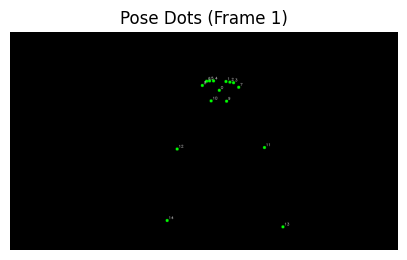


📌 Frame 2: Pose Landmarks (y, x) and CSV Column Indices
 0 - Nose: (y=211, x=688) → CSV Columns: y=211, x=210
 1 - Left Eye Inner: (y=182, x=710) → CSV Columns: y=216, x=215
 2 - Left Eye: (y=184, x=722) → CSV Columns: y=221, x=220
 3 - Left Eye Outer: (y=185, x=736) → CSV Columns: y=226, x=225
 4 - Right Eye Inner: (y=180, x=669) → CSV Columns: y=231, x=230
 5 - Right Eye: (y=180, x=657) → CSV Columns: y=236, x=235
 6 - Right Eye Outer: (y=180, x=645) → CSV Columns: y=241, x=240
 7 - Left Ear: (y=198, x=752) → CSV Columns: y=246, x=245
 8 - Right Ear: (y=193, x=635) → CSV Columns: y=251, x=250
 9 - Mouth Left: (y=243, x=712) → CSV Columns: y=256, x=255
10 - Mouth Right: (y=242, x=666) → CSV Columns: y=261, x=260
11 - Left Shoulder: (y=372, x=836) → CSV Columns: y=266, x=265
12 - Right Shoulder: (y=381, x=564) → CSV Columns: y=271, x=270
13 - Left Elbow: (y=658, x=877) → CSV Columns: y=276, x=275
14 - Right Elbow: (y=642, x=512) → CSV Columns: y=281, x=280
15 - Left Wrist: (y=543, x=6

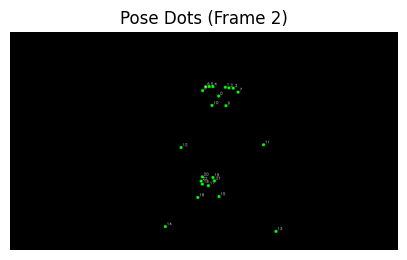


📌 Frame 3: Pose Landmarks (y, x) and CSV Column Indices
 0 - Nose: (y=211, x=692) → CSV Columns: y=211, x=210
 1 - Left Eye Inner: (y=182, x=714) → CSV Columns: y=216, x=215
 2 - Left Eye: (y=183, x=727) → CSV Columns: y=221, x=220
 3 - Left Eye Outer: (y=185, x=739) → CSV Columns: y=226, x=225
 4 - Right Eye Inner: (y=180, x=674) → CSV Columns: y=231, x=230
 5 - Right Eye: (y=180, x=661) → CSV Columns: y=236, x=235
 6 - Right Eye Outer: (y=180, x=651) → CSV Columns: y=241, x=240
 7 - Left Ear: (y=196, x=753) → CSV Columns: y=246, x=245
 8 - Right Ear: (y=191, x=634) → CSV Columns: y=251, x=250
 9 - Mouth Left: (y=244, x=716) → CSV Columns: y=256, x=255
10 - Mouth Right: (y=244, x=665) → CSV Columns: y=261, x=260
11 - Left Shoulder: (y=367, x=830) → CSV Columns: y=266, x=265
12 - Right Shoulder: (y=375, x=567) → CSV Columns: y=271, x=270
13 - Left Elbow: (y=659, x=854) → CSV Columns: y=276, x=275
14 - Right Elbow: (y=637, x=524) → CSV Columns: y=281, x=280
15 - Left Wrist: (y=488, x=7

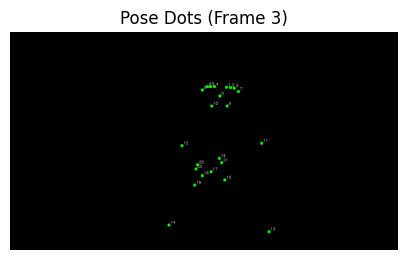


📌 Frame 4: Pose Landmarks (y, x) and CSV Column Indices
 0 - Nose: (y=212, x=687) → CSV Columns: y=211, x=210
 1 - Left Eye Inner: (y=182, x=708) → CSV Columns: y=216, x=215
 2 - Left Eye: (y=184, x=720) → CSV Columns: y=221, x=220
 3 - Left Eye Outer: (y=186, x=732) → CSV Columns: y=226, x=225
 4 - Right Eye Inner: (y=181, x=667) → CSV Columns: y=231, x=230
 5 - Right Eye: (y=181, x=655) → CSV Columns: y=236, x=235
 6 - Right Eye Outer: (y=183, x=642) → CSV Columns: y=241, x=240
 7 - Left Ear: (y=201, x=747) → CSV Columns: y=246, x=245
 8 - Right Ear: (y=195, x=629) → CSV Columns: y=251, x=250
 9 - Mouth Left: (y=245, x=711) → CSV Columns: y=256, x=255
10 - Mouth Right: (y=245, x=661) → CSV Columns: y=261, x=260
11 - Left Shoulder: (y=365, x=830) → CSV Columns: y=266, x=265
12 - Right Shoulder: (y=378, x=558) → CSV Columns: y=271, x=270
13 - Left Elbow: (y=655, x=852) → CSV Columns: y=276, x=275
14 - Right Elbow: (y=642, x=533) → CSV Columns: y=281, x=280
15 - Left Wrist: (y=501, x=7

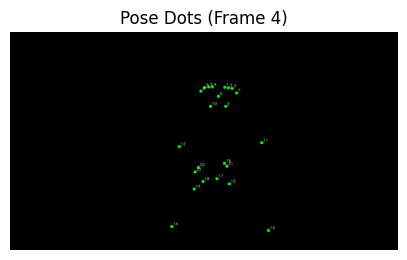


📌 Frame 5: Pose Landmarks (y, x) and CSV Column Indices
 0 - Nose: (y=209, x=686) → CSV Columns: y=211, x=210
 1 - Left Eye Inner: (y=178, x=708) → CSV Columns: y=216, x=215
 2 - Left Eye: (y=179, x=720) → CSV Columns: y=221, x=220
 3 - Left Eye Outer: (y=180, x=732) → CSV Columns: y=226, x=225
 4 - Right Eye Inner: (y=178, x=666) → CSV Columns: y=231, x=230
 5 - Right Eye: (y=179, x=655) → CSV Columns: y=236, x=235
 6 - Right Eye Outer: (y=180, x=643) → CSV Columns: y=241, x=240
 7 - Left Ear: (y=193, x=750) → CSV Columns: y=246, x=245
 8 - Right Ear: (y=194, x=630) → CSV Columns: y=251, x=250
 9 - Mouth Left: (y=240, x=710) → CSV Columns: y=256, x=255
10 - Mouth Right: (y=240, x=662) → CSV Columns: y=261, x=260
11 - Left Shoulder: (y=372, x=838) → CSV Columns: y=266, x=265
12 - Right Shoulder: (y=390, x=559) → CSV Columns: y=271, x=270
13 - Left Elbow: (y=657, x=871) → CSV Columns: y=276, x=275
14 - Right Elbow: (y=648, x=526) → CSV Columns: y=281, x=280
15 - Left Wrist: (y=551, x=7

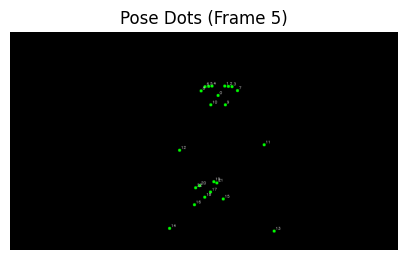


✅ Finished processing video.


In [14]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

# Load MediaPipe Pose Landmarker
base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Pose landmark names (33 landmarks)
pose_landmarks = [
    "Nose", "Left Eye Inner", "Left Eye", "Left Eye Outer",
    "Right Eye Inner", "Right Eye", "Right Eye Outer", "Left Ear", "Right Ear",
    "Mouth Left", "Mouth Right", "Left Shoulder", "Right Shoulder",
    "Left Elbow", "Right Elbow", "Left Wrist", "Right Wrist",
    "Left Pinky", "Right Pinky", "Left Index", "Right Index",
    "Left Thumb", "Right Thumb", "Left Hip", "Right Hip",
    "Left Knee", "Right Knee", "Left Ankle", "Right Ankle",
    "Left Heel", "Right Heel", "Left Foot Index", "Right Foot Index"
]

# Constants for pose column indices in the CSV file
FEATURES_PER_LANDMARK = 5  # (x, y, z, visibility, presence)
POSE_START_INDEX = 210  # Pose landmarks start at column 210
POSE_INDICES = [
    (POSE_START_INDEX + i * FEATURES_PER_LANDMARK + 1,  # y-index
     POSE_START_INDEX + i * FEATURES_PER_LANDMARK)      # x-index
    for i in range(33)
]

def extract_and_visualize_pose(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Error: Could not open video at {video_path}")
        return

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    selected_frames = []
    step = max(1, frame_count // 5)  # Ensure jumps of 5
    frame_indices = list(range(0, frame_count, step))[:5]  # Pick 5 frames

    for i, frame_index in enumerate(frame_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()
        if not ret:
            continue

        # Convert to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

        # Detect pose landmarks
        pose_result = pose_landmarker.detect(mp_frame)

        # If pose landmarks are detected, process them
        pose_points = []

        if pose_result.pose_landmarks:
            pose = pose_result.pose_landmarks[0]  # First detected pose
            # Extract (y, x) coordinates
            pose_points = [(int(point.y * frame_height), int(point.x * frame_width)) for point in pose]

        # If no pose is detected, continue
        if not pose_points:
            print(f"⚠️ No pose detected in Frame {i+1} (Index {frame_index})")
            continue

        # Print extracted points with CSV column indices
        print(f"\n📌 Frame {i+1}: Pose Landmarks (y, x) and CSV Column Indices")
        for idx, ((y, x), (csv_y_index, csv_x_index)) in enumerate(zip(pose_points, POSE_INDICES)):
            print(f"{idx:2d} - {pose_landmarks[idx]}: (y={y}, x={x}) → CSV Columns: y={csv_y_index}, x={csv_x_index}")

        # Draw landmarks as dots only
        black_image = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)

        # Draw landmarks with indices
        for idx, (y, x) in enumerate(pose_points):
            cv2.circle(black_image, (x, y), 5, (0, 255, 0), -1)  # Draw dots
            cv2.putText(black_image, f"{idx}", (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

        # Show black image with only dots
        plt.figure(figsize=(5, 5))
        plt.imshow(black_image)
        plt.title(f"Pose Dots (Frame {i+1})")
        plt.axis("off")
        plt.show()

    cap.release()
    print("\n✅ Finished processing video.")

# Run the function on your specified video
video_path = "/content/drive/MyDrive/ASL_project/Dataset/train/book/07069_book.mp4"
extract_and_visualize_pose(video_path)


⚠️ No hands detected in Frame 1 (Index 0)

📌 Frame 2: Right Hand Landmarks (y, x) and CSV Column Indices
 0 - Wrist: (y=557, x=617) → CSV Columns: y=106, x=105
 1 - Thumb CMC: (y=546, x=630) → CSV Columns: y=111, x=110
 2 - Thumb MCP: (y=516, x=632) → CSV Columns: y=116, x=115
 3 - Thumb IP: (y=489, x=628) → CSV Columns: y=121, x=120
 4 - Thumb Tip: (y=470, x=626) → CSV Columns: y=126, x=125
 5 - Index MCP: (y=489, x=637) → CSV Columns: y=131, x=130
 6 - Index PIP: (y=458, x=637) → CSV Columns: y=136, x=135
 7 - Index DIP: (y=438, x=637) → CSV Columns: y=141, x=140
 8 - Index Tip: (y=423, x=636) → CSV Columns: y=146, x=145
 9 - Middle MCP: (y=487, x=631) → CSV Columns: y=151, x=150
10 - Middle PIP: (y=456, x=632) → CSV Columns: y=156, x=155
11 - Middle DIP: (y=436, x=633) → CSV Columns: y=161, x=160
12 - Middle Tip: (y=419, x=636) → CSV Columns: y=166, x=165
13 - Ring MCP: (y=487, x=626) → CSV Columns: y=171, x=170
14 - Ring PIP: (y=459, x=627) → CSV Columns: y=176, x=175
15 - Ring DIP

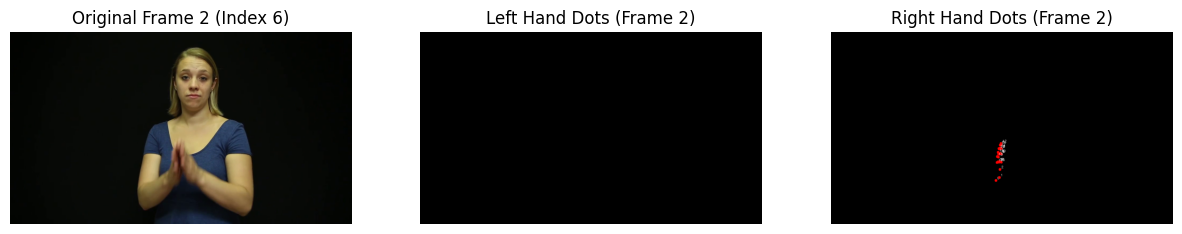


📌 Frame 3: Left Hand Landmarks (y, x) and CSV Column Indices
 0 - Wrist: (y=479, x=702) → CSV Columns: y=1, x=0
 1 - Thumb CMC: (y=443, x=718) → CSV Columns: y=6, x=5
 2 - Thumb MCP: (y=405, x=725) → CSV Columns: y=11, x=10
 3 - Thumb IP: (y=378, x=730) → CSV Columns: y=16, x=15
 4 - Thumb Tip: (y=361, x=743) → CSV Columns: y=21, x=20
 5 - Index MCP: (y=415, x=721) → CSV Columns: y=26, x=25
 6 - Index PIP: (y=383, x=706) → CSV Columns: y=31, x=30
 7 - Index DIP: (y=365, x=697) → CSV Columns: y=36, x=35
 8 - Index Tip: (y=349, x=691) → CSV Columns: y=41, x=40
 9 - Middle MCP: (y=428, x=707) → CSV Columns: y=46, x=45
10 - Middle PIP: (y=391, x=692) → CSV Columns: y=51, x=50
11 - Middle DIP: (y=370, x=682) → CSV Columns: y=56, x=55
12 - Middle Tip: (y=354, x=674) → CSV Columns: y=61, x=60
13 - Ring MCP: (y=440, x=691) → CSV Columns: y=66, x=65
14 - Ring PIP: (y=407, x=678) → CSV Columns: y=71, x=70
15 - Ring DIP: (y=388, x=670) → CSV Columns: y=76, x=75
16 - Ring Tip: (y=371, x=665) → CS

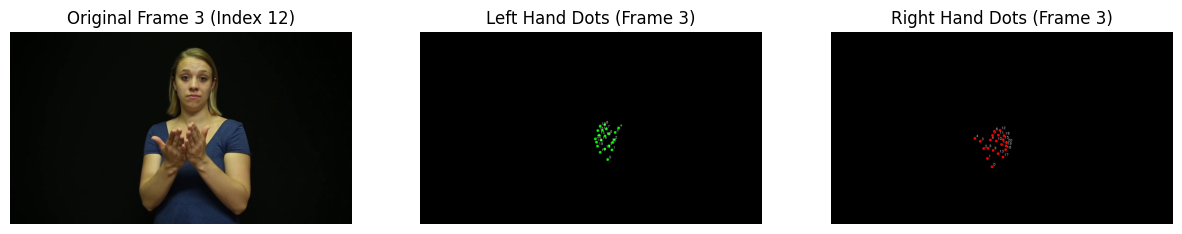


📌 Frame 4: Left Hand Landmarks (y, x) and CSV Column Indices
 0 - Wrist: (y=498, x=717) → CSV Columns: y=1, x=0
 1 - Thumb CMC: (y=464, x=728) → CSV Columns: y=6, x=5
 2 - Thumb MCP: (y=429, x=733) → CSV Columns: y=11, x=10
 3 - Thumb IP: (y=402, x=736) → CSV Columns: y=16, x=15
 4 - Thumb Tip: (y=385, x=746) → CSV Columns: y=21, x=20
 5 - Index MCP: (y=435, x=724) → CSV Columns: y=26, x=25
 6 - Index PIP: (y=407, x=704) → CSV Columns: y=31, x=30
 7 - Index DIP: (y=393, x=690) → CSV Columns: y=36, x=35
 8 - Index Tip: (y=379, x=678) → CSV Columns: y=41, x=40
 9 - Middle MCP: (y=450, x=708) → CSV Columns: y=46, x=45
10 - Middle PIP: (y=420, x=686) → CSV Columns: y=51, x=50
11 - Middle DIP: (y=402, x=671) → CSV Columns: y=56, x=55
12 - Middle Tip: (y=387, x=660) → CSV Columns: y=61, x=60
13 - Ring MCP: (y=466, x=692) → CSV Columns: y=66, x=65
14 - Ring PIP: (y=439, x=671) → CSV Columns: y=71, x=70
15 - Ring DIP: (y=422, x=660) → CSV Columns: y=76, x=75
16 - Ring Tip: (y=407, x=653) → CS

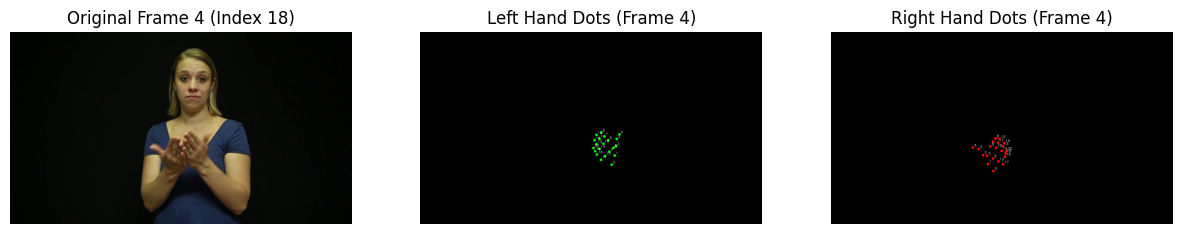


📌 Frame 5: Left Hand Landmarks (y, x) and CSV Column Indices
 0 - Wrist: (y=546, x=692) → CSV Columns: y=1, x=0
 1 - Thumb CMC: (y=519, x=707) → CSV Columns: y=6, x=5
 2 - Thumb MCP: (y=485, x=717) → CSV Columns: y=11, x=10
 3 - Thumb IP: (y=458, x=723) → CSV Columns: y=16, x=15
 4 - Thumb Tip: (y=440, x=735) → CSV Columns: y=21, x=20
 5 - Index MCP: (y=507, x=714) → CSV Columns: y=26, x=25
 6 - Index PIP: (y=484, x=689) → CSV Columns: y=31, x=30
 7 - Index DIP: (y=476, x=678) → CSV Columns: y=36, x=35
 8 - Index Tip: (y=473, x=675) → CSV Columns: y=41, x=40
 9 - Middle MCP: (y=522, x=695) → CSV Columns: y=46, x=45
10 - Middle PIP: (y=493, x=668) → CSV Columns: y=51, x=50
11 - Middle DIP: (y=486, x=663) → CSV Columns: y=56, x=55
12 - Middle Tip: (y=485, x=663) → CSV Columns: y=61, x=60
13 - Ring MCP: (y=531, x=677) → CSV Columns: y=66, x=65
14 - Ring PIP: (y=504, x=653) → CSV Columns: y=71, x=70
15 - Ring DIP: (y=496, x=649) → CSV Columns: y=76, x=75
16 - Ring Tip: (y=493, x=651) → CS

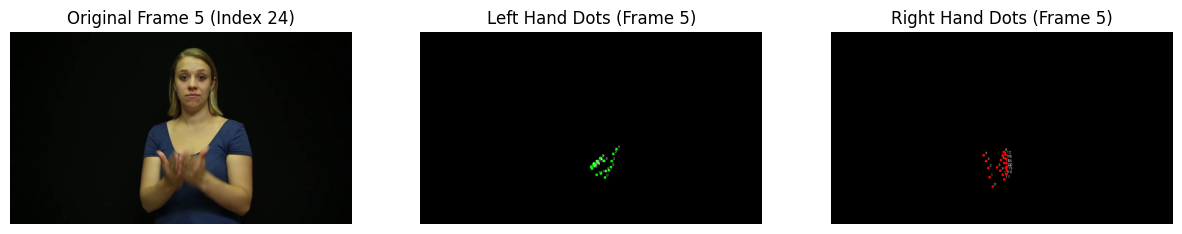


✅ Finished processing video.


In [15]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

# Load MediaPipe Hand Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

# Hand landmark names (21 per hand)
hand_landmarks = [
    "Wrist", "Thumb CMC", "Thumb MCP", "Thumb IP", "Thumb Tip",
    "Index MCP", "Index PIP", "Index DIP", "Index Tip",
    "Middle MCP", "Middle PIP", "Middle DIP", "Middle Tip",
    "Ring MCP", "Ring PIP", "Ring DIP", "Ring Tip",
    "Pinky MCP", "Pinky PIP", "Pinky DIP", "Pinky Tip"
]

# Constants for hand column indices in the CSV file
FEATURES_PER_LANDMARK = 5  # (x, y, z, visibility, presence)
LEFT_HAND_START_INDEX = 0
RIGHT_HAND_START_INDEX = 105

# Create index mappings for both hands
LEFT_HAND_INDICES = [(LEFT_HAND_START_INDEX + i * FEATURES_PER_LANDMARK + 1,  # y-index
                      LEFT_HAND_START_INDEX + i * FEATURES_PER_LANDMARK)      # x-index
                     for i in range(21)]

RIGHT_HAND_INDICES = [(RIGHT_HAND_START_INDEX + i * FEATURES_PER_LANDMARK + 1,  # y-index
                       RIGHT_HAND_START_INDEX + i * FEATURES_PER_LANDMARK)      # x-index
                      for i in range(21)]

def extract_and_visualize_hands(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Error: Could not open video at {video_path}")
        return

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    selected_frames = []
    step = max(1, frame_count // 5)  # Ensure jumps of 5
    frame_indices = list(range(0, frame_count, step))[:5]  # Pick 5 frames

    for i, frame_index in enumerate(frame_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()
        if not ret:
            continue

        # Convert to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

        # Detect hand landmarks
        hand_result = hand_landmarker.detect(mp_frame)

        # Store hand landmarks
        left_hand_points = []
        right_hand_points = []

        if hand_result.hand_landmarks:
            for hand_idx, hand in enumerate(hand_result.hand_landmarks):
                # Ensure hands are assigned correctly using `handedness`
                if hand_result.handedness[hand_idx][0].category_name == "Left":
                    left_hand_points = [(int(point.y * frame_height), int(point.x * frame_width)) for point in hand]
                else:
                    right_hand_points = [(int(point.y * frame_height), int(point.x * frame_width)) for point in hand]

        # Handle cases where no hands are detected
        if not left_hand_points and not right_hand_points:
            print(f"⚠️ No hands detected in Frame {i+1} (Index {frame_index})")
            continue

        # Create black images for visualization
        black_image_left = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)
        black_image_right = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)

        # Print Left Hand landmarks
        if left_hand_points:
            print(f"\n📌 Frame {i+1}: Left Hand Landmarks (y, x) and CSV Column Indices")
            for idx, ((y, x), (csv_y_index, csv_x_index)) in enumerate(zip(left_hand_points, LEFT_HAND_INDICES)):
                print(f"{idx:2d} - {hand_landmarks[idx]}: (y={y}, x={x}) → CSV Columns: y={csv_y_index}, x={csv_x_index}")
                cv2.circle(black_image_left, (x, y), 5, (0, 255, 0), -1)  # Green dots for left hand
                cv2.putText(black_image_left, f"{idx}", (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

        # Print Right Hand landmarks
        if right_hand_points:
            print(f"\n📌 Frame {i+1}: Right Hand Landmarks (y, x) and CSV Column Indices")
            for idx, ((y, x), (csv_y_index, csv_x_index)) in enumerate(zip(right_hand_points, RIGHT_HAND_INDICES)):
                print(f"{idx:2d} - {hand_landmarks[idx]}: (y={y}, x={x}) → CSV Columns: y={csv_y_index}, x={csv_x_index}")
                cv2.circle(black_image_right, (x, y), 5, (255, 0, 0), -1)  # Blue dots for right hand
                cv2.putText(black_image_right, f"{idx}", (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

        # Show original frame, left-hand visualization, and right-hand visualization
        plt.figure(figsize=(15, 5))

        # Display original frame
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title(f"Original Frame {i+1} (Index {frame_index})")
        plt.axis("off")

        # Display left-hand visualization
        plt.subplot(1, 3, 2)
        plt.imshow(black_image_left)
        plt.title(f"Left Hand Dots (Frame {i+1})")
        plt.axis("off")

        # Display right-hand visualization
        plt.subplot(1, 3, 3)
        plt.imshow(black_image_right)
        plt.title(f"Right Hand Dots (Frame {i+1})")
        plt.axis("off")

        plt.show()

    cap.release()
    print("\n✅ Finished processing video.")

# Run the function on your specified video
video_path = "/content/drive/MyDrive/ASL_project/Dataset/train/book/07069_book.mp4"
extract_and_visualize_hands(video_path)


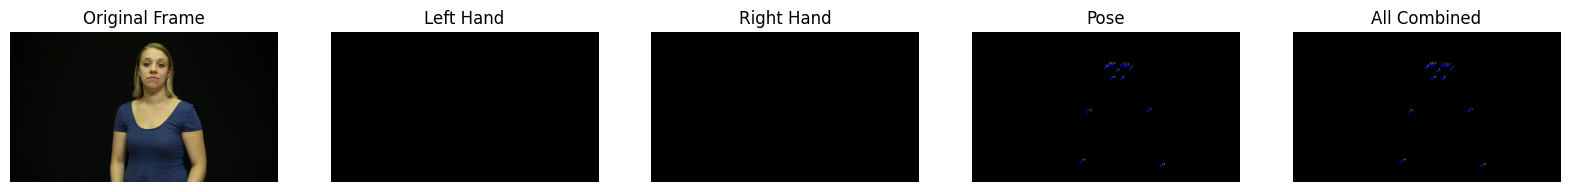

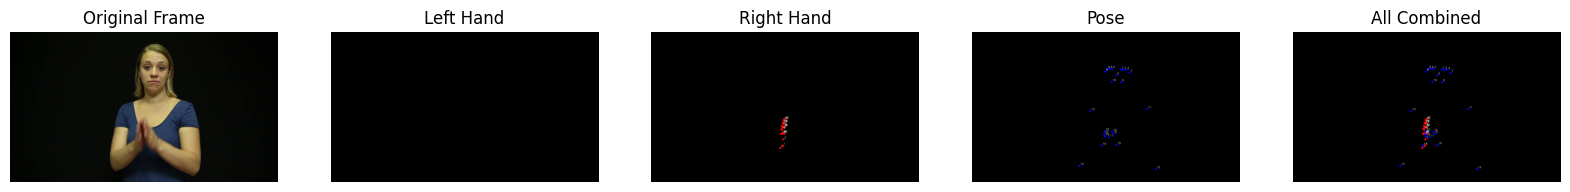

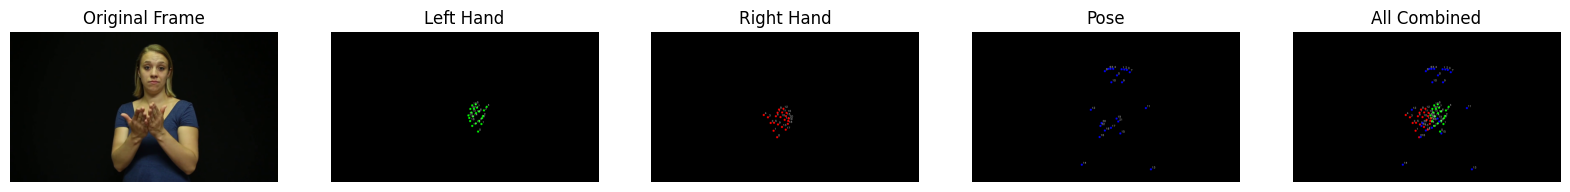

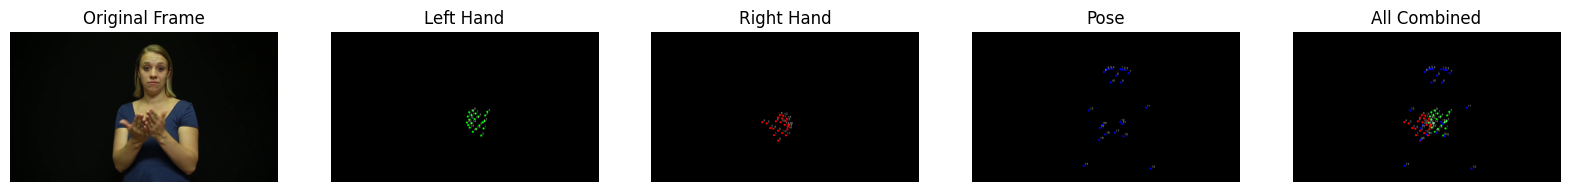

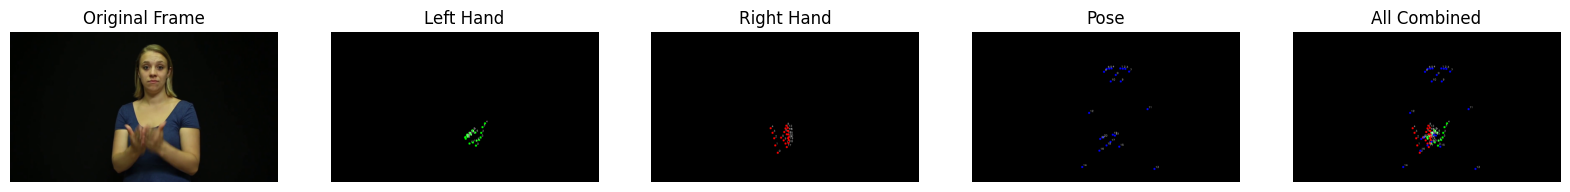


✅ Finished processing video.


In [17]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

# Load MediaPipe Hand and Pose Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Landmark names
hand_landmarks = [
    "Wrist", "Thumb CMC", "Thumb MCP", "Thumb IP", "Thumb Tip",
    "Index MCP", "Index PIP", "Index DIP", "Index Tip",
    "Middle MCP", "Middle PIP", "Middle DIP", "Middle Tip",
    "Ring MCP", "Ring PIP", "Ring DIP", "Ring Tip",
    "Pinky MCP", "Pinky PIP", "Pinky DIP", "Pinky Tip"
]

pose_landmarks = [
    "Nose", "Left Eye Inner", "Left Eye", "Left Eye Outer",
    "Right Eye Inner", "Right Eye", "Right Eye Outer", "Left Ear", "Right Ear",
    "Mouth Left", "Mouth Right", "Left Shoulder", "Right Shoulder",
    "Left Elbow", "Right Elbow", "Left Wrist", "Right Wrist",
    "Left Pinky", "Right Pinky", "Left Index", "Right Index",
    "Left Thumb", "Right Thumb", "Left Hip", "Right Hip",
    "Left Knee", "Right Knee", "Left Ankle", "Right Ankle",
    "Left Heel", "Right Heel", "Left Foot Index", "Right Foot Index"
]

def extract_and_visualize_all(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Error: Could not open video at {video_path}")
        return

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    step = max(1, frame_count // 5)  # Ensure jumps of 5
    frame_indices = list(range(0, frame_count, step))[:5]  # Pick 5 frames

    for i, frame_index in enumerate(frame_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()
        if not ret:
            continue

        # Convert to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

        # Detect hand and pose landmarks
        hand_result = hand_landmarker.detect(mp_frame)
        pose_result = pose_landmarker.detect(mp_frame)

        # Store landmarks
        left_hand_points, right_hand_points, pose_points = [], [], []

        # Assign left and right hands correctly
        if hand_result.hand_landmarks:
            for hand_idx, hand in enumerate(hand_result.hand_landmarks):
                if hand_result.handedness[hand_idx][0].category_name == "Left":
                    left_hand_points = [(int(point.y * frame_height), int(point.x * frame_width)) for point in hand]
                else:
                    right_hand_points = [(int(point.y * frame_height), int(point.x * frame_width)) for point in hand]

        # Process pose landmarks
        if pose_result.pose_landmarks:
            pose = pose_result.pose_landmarks[0]
            pose_points = [(int(point.y * frame_height), int(point.x * frame_width)) for point in pose]

        # Create black images for visualization
        black_image_left = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)
        black_image_right = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)
        black_image_pose = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)
        black_image_combined = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)

        # Function to draw landmarks with labels
        def draw_landmarks(image, points, color):
            for idx, (y, x) in enumerate(points):
                cv2.circle(image, (x, y), 5, color, -1)  # Draw dot
                cv2.putText(image, f"{idx}", (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

        # Print and visualize left hand
        if left_hand_points:
            draw_landmarks(black_image_left, left_hand_points, (0, 255, 0))  # Green
            draw_landmarks(black_image_combined, left_hand_points, (0, 255, 0))

        # Print and visualize right hand
        if right_hand_points:
            draw_landmarks(black_image_right, right_hand_points, (255, 0, 0))  # Blue
            draw_landmarks(black_image_combined, right_hand_points, (255, 0, 0))

        # Print and visualize pose
        if pose_points:
            draw_landmarks(black_image_pose, pose_points, (0, 0, 255))  # Red
            draw_landmarks(black_image_combined, pose_points, (0, 0, 255))

        # Display images
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 5, 1); plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)); plt.title("Original Frame"); plt.axis("off")
        plt.subplot(1, 5, 2); plt.imshow(black_image_left); plt.title("Left Hand"); plt.axis("off")
        plt.subplot(1, 5, 3); plt.imshow(black_image_right); plt.title("Right Hand"); plt.axis("off")
        plt.subplot(1, 5, 4); plt.imshow(black_image_pose); plt.title("Pose"); plt.axis("off")
        plt.subplot(1, 5, 5); plt.imshow(black_image_combined); plt.title("All Combined"); plt.axis("off")
        plt.show()

    cap.release()
    print("\n✅ Finished processing video.")

# Run the function on your specified video
video_path = "/content/drive/MyDrive/ASL_project/Dataset/train/book/07069_book.mp4"
extract_and_visualize_all(video_path)


In [18]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd
import os

# Load MediaPipe Hand and Pose Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Number of landmarks
LEFT_HAND_LANDMARKS = 21
RIGHT_HAND_LANDMARKS = 21
POSE_LANDMARKS = 33

# Expected total columns (x, y for each landmark)
TOTAL_COLUMNS = (LEFT_HAND_LANDMARKS + RIGHT_HAND_LANDMARKS + POSE_LANDMARKS) * 2

def extract_and_save_normalized_landmarks(video_path, output_csv_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Error: Could not open video at {video_path}")
        return

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Storage for all frames
    all_frames_data = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

        # Detect hand and pose landmarks
        hand_result = hand_landmarker.detect(mp_frame)
        pose_result = pose_landmarker.detect(mp_frame)

        # Initialize a row with zeros (for missing landmarks)
        frame_data = [0.0] * TOTAL_COLUMNS

        # Store left and right hand landmarks (normalized)
        if hand_result.hand_landmarks:
            for hand_idx, hand in enumerate(hand_result.hand_landmarks):
                # Identify left or right hand
                if hand_result.handedness[hand_idx][0].category_name == "Left":
                    base_idx = 0  # Left hand starts at index 0
                else:
                    base_idx = LEFT_HAND_LANDMARKS * 2  # Right hand starts after left hand

                for landmark_idx, landmark in enumerate(hand):
                    x = landmark.x  # Normalized (0 to 1)
                    y = landmark.y  # Normalized (0 to 1)
                    frame_data[base_idx + landmark_idx * 2] = x
                    frame_data[base_idx + landmark_idx * 2 + 1] = y

        # Store pose landmarks (normalized)
        if pose_result.pose_landmarks:
            base_idx = (LEFT_HAND_LANDMARKS + RIGHT_HAND_LANDMARKS) * 2  # Pose starts after both hands
            for landmark_idx, landmark in enumerate(pose_result.pose_landmarks[0]):
                x = landmark.x  # Normalized (0 to 1)
                y = landmark.y  # Normalized (0 to 1)
                frame_data[base_idx + landmark_idx * 2] = x
                frame_data[base_idx + landmark_idx * 2 + 1] = y

        # Append frame data
        all_frames_data.append(frame_data)

    cap.release()

    # Convert to DataFrame and save
    df = pd.DataFrame(all_frames_data)
    df.to_csv(output_csv_path, index=False, header=False)
    print(f"✅ Saved normalized landmarks (X, Y only) to {output_csv_path}")

# Example Usage
video_path = "/content/drive/MyDrive/ASL_project/Dataset/train/book/07069_book.mp4"
output_csv_path = "/content/drive/MyDrive/ASL_project/Dataset/landmark_xy/07069_book.csv"
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)  # Ensure output folder exists
extract_and_save_normalized_landmarks(video_path, output_csv_path)


✅ Saved normalized landmarks (X, Y only) to /content/drive/MyDrive/ASL_project/Dataset/landmark_xy/07069_book.csv


In [20]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd
import os

# Load MediaPipe Hand and Pose Landmarker
base_options_hand = python.BaseOptions(model_asset_path='hand_landmarker.task')
options_hand = vision.HandLandmarkerOptions(
    base_options=base_options_hand,
    num_hands=2
)
hand_landmarker = vision.HandLandmarker.create_from_options(options_hand)

base_options_pose = python.BaseOptions(model_asset_path='pose_landmarker.task')
options_pose = vision.PoseLandmarkerOptions(
    base_options=base_options_pose,
    output_segmentation_masks=True
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options_pose)

# Number of landmarks
LEFT_HAND_LANDMARKS = 21
RIGHT_HAND_LANDMARKS = 21
POSE_LANDMARKS = 33

# Expected total columns (x, y for each landmark)
TOTAL_COLUMNS = (LEFT_HAND_LANDMARKS + RIGHT_HAND_LANDMARKS + POSE_LANDMARKS) * 2

def extract_and_save_normalized_landmarks(video_path, output_csv_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Error: Could not open video at {video_path}")
        return

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Storage for all frames
    all_frames_data = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

        # Detect hand and pose landmarks
        hand_result = hand_landmarker.detect(mp_frame)
        pose_result = pose_landmarker.detect(mp_frame)

        # Initialize a row with zeros (for missing landmarks)
        frame_data = [0.0] * TOTAL_COLUMNS

        # Store left and right hand landmarks (normalized)
        if hand_result.hand_landmarks:
            for hand_idx, hand in enumerate(hand_result.hand_landmarks):
                # Identify left or right hand
                if hand_result.handedness[hand_idx][0].category_name == "Left":
                    base_idx = 0  # Left hand starts at index 0
                else:
                    base_idx = LEFT_HAND_LANDMARKS * 2  # Right hand starts after left hand

                for landmark_idx, landmark in enumerate(hand):
                    x = landmark.x  # Normalized (0 to 1)
                    y = landmark.y  # Normalized (0 to 1)
                    frame_data[base_idx + landmark_idx * 2] = x
                    frame_data[base_idx + landmark_idx * 2 + 1] = y

        # Store pose landmarks (normalized)
        if pose_result.pose_landmarks:
            base_idx = (LEFT_HAND_LANDMARKS + RIGHT_HAND_LANDMARKS) * 2  # Pose starts after both hands
            for landmark_idx, landmark in enumerate(pose_result.pose_landmarks[0]):
                x = landmark.x  # Normalized (0 to 1)
                y = landmark.y  # Normalized (0 to 1)
                frame_data[base_idx + landmark_idx * 2] = x
                frame_data[base_idx + landmark_idx * 2 + 1] = y

        # Append frame data
        all_frames_data.append(frame_data)

    cap.release()

    # Convert to DataFrame and save
    df = pd.DataFrame(all_frames_data)
    df.to_csv(output_csv_path, index=False, header=False)
    print(f"✅ Saved normalized landmarks (X, Y only) to {output_csv_path}")

def process_all_videos(input_folder, output_folder):
    # Walk through all subfolders and videos
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".mp4"):  # Process only video files
                input_video_path = os.path.join(root, file)

                # Determine subfolder structure for the output
                relative_path = os.path.relpath(root, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)  # Ensure subfolder exists

                # Output CSV path
                output_csv_path = os.path.join(output_subfolder, file.replace('.mp4', '.csv'))

                # Process the video
                print(f"📌 Processing: {input_video_path} → {output_csv_path}")
                extract_and_save_normalized_landmarks(input_video_path, output_csv_path)

# Example Usage
input_videos_folder = "/content/drive/MyDrive/ASL_project/Dataset/test"
output_csv_folder = "/content/drive/MyDrive/ASL_project/Dataset/landmark_xy_test"
process_all_videos(input_videos_folder, output_csv_folder)

📌 Processing: /content/drive/MyDrive/ASL_project/Dataset/test/book/07068_book.mp4 → /content/drive/MyDrive/ASL_project/Dataset/landmark_xy_test/book/07068_book.csv
✅ Saved normalized landmarks (X, Y only) to /content/drive/MyDrive/ASL_project/Dataset/landmark_xy_test/book/07068_book.csv
📌 Processing: /content/drive/MyDrive/ASL_project/Dataset/test/book/07070_book.mp4 → /content/drive/MyDrive/ASL_project/Dataset/landmark_xy_test/book/07070_book.csv
✅ Saved normalized landmarks (X, Y only) to /content/drive/MyDrive/ASL_project/Dataset/landmark_xy_test/book/07070_book.csv
📌 Processing: /content/drive/MyDrive/ASL_project/Dataset/test/book/WhatsApp Video 2025-01-18 at 17.09.46.mp4 → /content/drive/MyDrive/ASL_project/Dataset/landmark_xy_test/book/WhatsApp Video 2025-01-18 at 17.09.46.csv
✅ Saved normalized landmarks (X, Y only) to /content/drive/MyDrive/ASL_project/Dataset/landmark_xy_test/book/WhatsApp Video 2025-01-18 at 17.09.46.csv
📌 Processing: /content/drive/MyDrive/ASL_project/Datase